# Aadarsh Goyal
## MIS: 111915001
## ------------------------------------------------------------------------------------------------------------------------

## Import basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


<AxesSubplot:xlabel='quality', ylabel='count'>

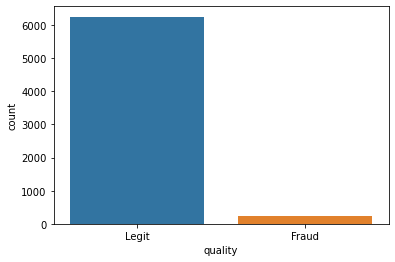

In [3]:
sns.countplot(x='quality',data=df)

## Preprocessing

In [4]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)
df['quality']= df['quality'].map({'Legit':0,'Fraud':1})

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


## Split data into training and testing

In [5]:
X = df.drop('quality',axis=1)
y = df['quality']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Lets move to SVM model

In [8]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

## Using GridSearchCV to run a grid search for the best C and gamma parameters.

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001,0.01,0.1,0.25,0.5,0.75,1]}
grid = GridSearchCV(svc,param_grid)

In [10]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]})

In [11]:
grid.best_params_

{'C': 1}

## Displaying Confusion matrix and Classification Report

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

grid_pred = grid.predict(scaled_X_test)
confusion_matrix(y_test,grid_pred)

array([[531,  92],
       [ 10,  17]], dtype=int64)

In [13]:
y_pred = grid.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.8430769230769231

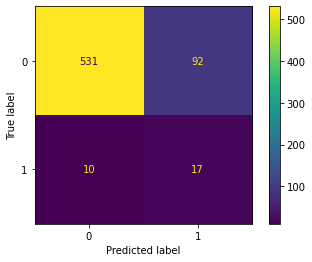

In [14]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

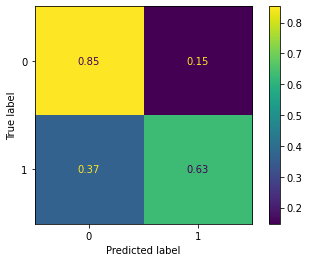

In [15]:
# Scaled so highest value=1
plot_confusion_matrix(grid,scaled_X_test,y_test,normalize='true')

In [16]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       623
           1       0.16      0.63      0.25        27

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

